In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Algorithm 1.2.3 Symmetric Storage Gaxpy
For symmetric matrix $A$, we can store its lower triangular part into $A.vec$ to save memory.
$$
A.vec(\frac{(2n-j)(j-1)}{2} + i) = a_{ij}
$$

### Create a symmetric matrix and store it

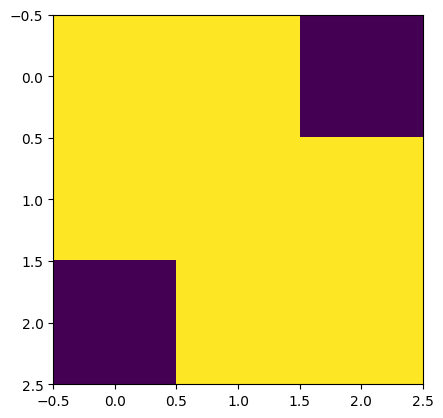

In [2]:
n = 3

# Create a symmetric matrix
A_lower = np.tril(np.random.randn(n, n))
A = A_lower + A_lower.T
plt.imshow(A, vmin=-1, vmax=1)
plt.show()

# Store the matrix in symmetric storage
A_vec = np.empty(n * (n + 1) // 2)
p = 0
for j in range(n):
    A_vec[p:p+n-j] = A[j:,j]
    p += n - j

### Implement and test the algorithm

In [3]:
def symmetric_gaxpy(A_vec, x, y):
    n = A.shape[0]

    def cal_vec_idx(i, j):
        if i < j:
            i, j = j, i
        return (2 * n - j - 1) * j // 2 + i

    # Lower
    for j in range(n):
        a1 = cal_vec_idx(j, j)
        a2 = a1 + n - j
        y[j:] = y[j:] + A_vec[a1:a2] * x[j]

    # Upper
    for i in range(n):
        a1 = cal_vec_idx(i, i + 1)
        a2 = a1 + n - i - 1
        y[i] = y[i] + A_vec[a1:a2] @ x[i+1:]

In [4]:
x = np.random.randn(n)
y = np.random.randn(n)

y_correct = y + A @ x
symmetric_gaxpy(A_vec, x, y)

if np.allclose(y_correct, y):
    print('Correct answer!')
else:
    print('Incorrect answer!')

Correct answer!
